<a href="https://colab.research.google.com/github/zimran98/zimran98/blob/main/demand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import os


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Watches Bags Accessories.csv to Watches Bags Accessories.csv


In [ ]:
df = pd.read_csv('Watches Bags Accessories.csv')

Data Loading & Cleaning

In [ ]:
df.shape

(1078, 9)

# New Section

In [ ]:
df.sample(5)

Title Rating in Stars  \
570   Roshnni 2023 New Luxury Watch Business Waterpr...           4.8/5   
1028  Women Fashion Quartz Female Watches Women Watc...           4.9/5   
823   Wellet For Girls Women's Long Wallet Solid Lac...           4.5/5   
887   Ultimate Collection of Stylish Ladies Handbags...           5-May   
304   Beanie Cap And Neck Warmer  Winter Knitted Bea...           4.6/5   

      Rating Count Sold Count       Delivery Current Price Original Price  \
570             67    94 Sold  Free Delivery         2,839      Rs. 4,399   
1028            65   151 Sold  Free Delivery           995      Rs. 2,599   
823            196   998 Sold  Free Delivery           349        Rs. 999   
887             77   109 Sold  Free Delivery         9,999            NaN   
304             18   203 Sold              0           499      Rs. 1,599   

              Category        Date  
570       Mens Watches   4/11/2023  
1028    Womens Watches    7/9/2024  
823        Womens Bags   4/12/2023  
887        Womens Bags  10/21/2023  
304   Mens Accessories   8/23/2023

In [ ]:
df.sample(5)


Title Rating in Stars  \
368   High Quality BAG for University  College schoo...           4.8/5   
333   New Style Mini Thin Men Wallet Card Holder Men...           4.2/5   
738   Gulshan center | New Shoulder Premium Quality ...           4.5/5   
802   1 Pc Unisex Leather Braided Woven Rope bts key...           3.8/5   
1048  Men Steel Strap Watch/Luxury Rose  Watch/Women...           3.7/5   

      Rating Count Sold Count       Delivery Current Price Original Price  \
368            895    3K Sold              0           899      Rs. 5,000   
333            223    1K Sold  Free Delivery           327      Rs. 1,285   
738            431    1K Sold  Free Delivery           999            NaN   
802             11   137 Sold  Free Delivery           139        Rs. 200   
1048            53   276 Sold  Free Delivery           739      Rs. 1,230   

            Category        Date  
368        Mens Bags  12/26/2023  
333        Mens Bags   9/21/2023  
738      Womens Bags   9/26/2023  
802      Womens Bags   3/22/2023  
1048  Womens Watches   7/29/2024

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1078 entries, 0 to 1077
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Title            1078 non-null   object
 1   Rating in Stars  1078 non-null   object
 2   Rating Count     1078 non-null   int64 
 3   Sold Count       1044 non-null   object
 4   Delivery         1078 non-null   object
 5   Current Price    1078 non-null   object
 6   Original Price   1010 non-null   object
 7   Category         1078 non-null   object
 8   Date             1077 non-null   object
dtypes: int64(1), object(8)
memory usage: 75.9+ KB


replacing "K" with "000" in sold count.

In [ ]:
df["Sold Count"] = df["Sold Count"].str.replace("K", "000")
df["Sold Count"] = df["Sold Count"].str.replace("Sold", "")
df.head()

Title Rating in Stars  \
0  Yfashion Cartoon  Electronic  Watch Life Water...           4.6/5   
1  100% Imported LED watch for men , boys and Kid...           4.3/5   
2  1 Cartoon Characters Analog Wrist Watch For Ki...           4.5/5   
3  M3 Touch LED Bracelet Digital Watch Band Good ...           4.6/5   
4            led Watches For Boys and Girls and kids           4.4/5   

   Rating Count Sold Count       Delivery Current Price Original Price  \
0           707      6000   Free Delivery           287        Rs. 520   
1           293      1000               0           270        Rs. 999   
2            57       452   Free Delivery           225        Rs. 750   
3            51       332   Free Delivery           160        Rs. 299   
4            54       476   Free Delivery           198        Rs. 300   

       Category        Date  
0  Kids Watches         NaN  
1  Kids Watches  12/18/2023  
2  Kids Watches   9/15/2023  
3  Kids Watches   6/12/2023  
4  Kids Watches   9/10/2023

Replacing "/5" with "" string. and then Changing its Data type.

In [ ]:
df["Rating in Stars"] = df["Rating in Stars"].str.replace("/5", "")
df.head(5)

Title Rating in Stars  \
0  Yfashion Cartoon  Electronic  Watch Life Water...             4.6   
1  100% Imported LED watch for men , boys and Kid...             4.3   
2  1 Cartoon Characters Analog Wrist Watch For Ki...             4.5   
3  M3 Touch LED Bracelet Digital Watch Band Good ...             4.6   
4            led Watches For Boys and Girls and kids             4.4   

   Rating Count Sold Count       Delivery Current Price Original Price  \
0           707      6000   Free Delivery           287        Rs. 520   
1           293      1000               0           270        Rs. 999   
2            57       452   Free Delivery           225        Rs. 750   
3            51       332   Free Delivery           160        Rs. 299   
4            54       476   Free Delivery           198        Rs. 300   

       Category        Date  
0  Kids Watches         NaN  
1  Kids Watches  12/18/2023  
2  Kids Watches   9/15/2023  
3  Kids Watches   6/12/2023  
4  Kids Watches   9/10/2023

In [ ]:
# Replace any non-numeric characters with empty string before converting to float
import re
df["Rating in Stars"] = df["Rating in Stars"].str.replace(r"[^0-9.]", "", regex=True)

# Convert the 'Rating in Stars' column to float, handling errors
df["Rating in Stars"] = pd.to_numeric(df["Rating in Stars"], errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1078 entries, 0 to 1077
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            1078 non-null   object 
 1   Rating in Stars  1078 non-null   float64
 2   Rating Count     1078 non-null   int64  
 3   Sold Count       1044 non-null   object 
 4   Delivery         1078 non-null   object 
 5   Current Price    1078 non-null   object 
 6   Original Price   1010 non-null   object 
 7   Category         1078 non-null   object 
 8   Date             1077 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 75.9+ KB


In [ ]:
# Count the number of NaN values in 'Rating in Stars' column
nan_count = df['Rating in Stars'].isna().sum()
print(f"Number of NaN values in 'Rating in Stars': {nan_count}")



Number of NaN values in 'Rating in Stars': 0


In [ ]:
# Count the number of NaN values in 'Date' column
nan_count = df['Date'].isna().sum()
print(f"Number of NaN values in 'Date': {nan_count}")

Number of NaN values in 'Date': 1


In [ ]:
df.dropna(subset=["Date"], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1077 entries, 1 to 1077
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            1077 non-null   object 
 1   Rating in Stars  1077 non-null   float64
 2   Rating Count     1077 non-null   int64  
 3   Sold Count       1043 non-null   object 
 4   Delivery         1077 non-null   object 
 5   Current Price    1077 non-null   object 
 6   Original Price   1009 non-null   object 
 7   Category         1077 non-null   object 
 8   Date             1077 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 84.1+ KB


In [ ]:
df.iloc[20:30]

Title  Rating in Stars  \
20  Total 2 Watchs Digital LED Watch For Boys & Ki...              4.6   
21  Rubber Strap Sports Watch Waterproof Wrist Wat...              5.0   
22  New Children's Timekeeping Silicone Watches Ar...              5.0   
23  Pakistan Holesales STUFF White Dial Barbie Lov...              4.8   
24  Kids Wristwatch with Silicone Band Ben10 Game ...              4.6   
25                children's LED digital sports watch              5.0   
26         3D Cartoon Character Analog Watch For Kids              4.7   
27  New Arrival 2023 Fashion Watch For Men Women &...              4.2   
28    new children watch amazing colour pink for kids              3.4   
29  FASHIONWATCHES  Anti Mosquito Bite Cartoon Fla...              3.3   

    Rating Count Sold Count       Delivery Current Price Original Price  \
20            51       179   Free Delivery           279        Rs. 444   
21             5        90   Free Delivery           599      Rs. 1,000   
22            26       330   Free Delivery           522        Rs. 928   
23            17       117               0           250        Rs. 450   
24            16       109               0           250        Rs. 300   
25             5        55   Free Delivery           159        Rs. 600   
26            95       612               0           249        Rs. 279   
27            25       212   Free Delivery           210            NaN   
28             8        74   Free Delivery           325        Rs. 500   
29             4        62   Free Delivery           199        Rs. 699   

        Category       Date  
20  Kids Watches  10/2/2023  
21  Kids Watches  7/29/2023  
22  Kids Watches  7/28/2023  
23  Kids Watches  5/10/2023  
24  Kids Watches  5/11/2023  
25  Kids Watches  5/12/2023  
26  Kids Watches  5/13/2023  
27  Kids Watches  5/14/2023  
28  Kids Watches  5/15/2023  
29  Kids Watches  5/16/2023

In [ ]:
#df["Currency"] = df["Currency"].str.replace(".", "")
#df.head()

In [ ]:
#df["Currency"].unique()

array(['Rs'], dtype=object)

In [ ]:
df["Current Price"] = df["Current Price"].str.replace(",", "")
df["Current Price"] = df["Current Price"].astype(int)
df.tail(5)

Title  Rating in Stars  \
1073  Online Sale Black Stainless Steel Crystal Wris...              4.3   
1074  Fashionable 3 Chrono Stain Less Steel Analog S...              3.8   
1075  Gold Color 12 Point Diamond Studded Magnet Sta...              4.4   
1076  Casual Women Romantic Starry Sky Wrist Watch L...              4.3   
1077  Analog Watches For Girls Luxury Stylish Analog...              4.6   

      Rating Count Sold Count       Delivery  Current Price Original Price  \
1073            24       184               0            449        Rs. 699   
1074             5        41   Free Delivery            648        Rs. 680   
1075             5        41   Free Delivery            295        Rs. 650   
1076           140      1000   Free Delivery            529        Rs. 686   
1077             5        34               0            275        Rs. 999   

            Category       Date  
1073  Womens Watches  8/23/2024  
1074  Womens Watches  8/24/2024  
1075  Womens Watches  8/25/2024  
1076  Womens Watches  8/26/2024  
1077  Womens Watches  8/27/2024

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1078 entries, 0 to 1077
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            1078 non-null   object 
 1   Rating in Stars  1078 non-null   float64
 2   Rating Count     1078 non-null   int64  
 3   Sold Count       1044 non-null   object 
 4   Delivery         1078 non-null   object 
 5   Current Price    1078 non-null   int64  
 6   Original Price   1010 non-null   object 
 7   Category         1078 non-null   object 
 8   Date             1077 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 75.9+ KB


In [ ]:
df["Original Price"] = df["Original Price"].str.replace("Rs. ", "")
df.iloc[5:15]

Title  Rating in Stars  \
6   Waterproof Black Color.  Water proof M3 Touch ...              4.3   
7   Cartoon Car kids Children Watch  for Boy Baby ...              4.6   
8      new children watch amazing colour red for kids              3.8   
9   children's watch sport LED digital touch watch...              5.0   
10  Digital 24 Images Automatic Projector Toy Watc...              4.6   
11  100% Imported LED Watches for Men, Boys and Ki...              4.4   
12  Children Watch Toy for Boy Baby Kids Watch Fas...              4.5   
13  Barbi-e Projector Light Digital Watch For Kids...              4.6   
14  Kids Electronic Watch Adjustable Silicone Stra...              3.6   
15         new Amazing kids watch Amazing colour pink              3.9   

    Rating Count Sold Count       Delivery  Current Price Original Price  \
6            264      2000   Free Delivery            170            700   
7             51       404               0            199            600   
8             16       184   Free Delivery            315            400   
9             25       217               0            150            550   
10            36       182   Free Delivery            590            999   
11            57       256               0            259            NaN   
12           142      1000               0            249            499   
13            83       371               0            490            799   
14            22       182               0            289            600   
15            15       137               0            325            400   

        Category        Date  
6   Kids Watches  11/25/2023  
7   Kids Watches   7/26/2023  
8   Kids Watches   7/27/2023  
9   Kids Watches   7/10/2023  
10  Kids Watches   7/11/2023  
11  Kids Watches   7/12/2023  
12  Kids Watches  10/20/2023  
13  Kids Watches   9/21/2023  
14  Kids Watches    8/4/2023  
15  Kids Watches    8/5/2023

In [ ]:
df["Original Price"] = df["Original Price"].str.replace(",", "")
df.head(3)

Title  Rating in Stars  \
1  100% Imported LED watch for men , boys and Kid...              4.3   
2  1 Cartoon Characters Analog Wrist Watch For Ki...              4.5   
3  M3 Touch LED Bracelet Digital Watch Band Good ...              4.6   

   Rating Count Sold Count       Delivery  Current Price Original Price  \
1           293      1000               0            270            999   
2            57       452   Free Delivery            225            750   
3            51       332   Free Delivery            160            299   

       Category        Date  
1  Kids Watches  12/18/2023  
2  Kids Watches   9/15/2023  
3  Kids Watches   6/12/2023

In [ ]:
# Count of null values in the 'Original Price' column
null_count = df['Original Price'].isnull().sum()
print(f"Number of null values in 'Original Price': {null_count}")


Number of null values in 'Original Price': 68


In [ ]:
# Filter rows with null values in 'Original Price'
null_rows = df[df['Original Price'].isnull()]
print(null_rows)


                                                  Title  Rating in Stars  \
11    100% Imported LED Watches for Men, Boys and Ki...              4.4   
27    New Arrival 2023 Fashion Watch For Men Women &...              4.2   
30    Student Calculator Digital Watch - Sports Watc...              4.2   
52    Wrist golden watch for boys - Unique and Styli...              5.0   
57     3d Doll Cartoon Character Analog Watch For Girls              4.8   
60    Kids Pretty Girl Doll Projector Watch for Girl...              4.5   
92    Wrist golden watch for boys - Unique and Styli...              5.0   
95     3d Doll Cartoon Character Analog Watch For Girls              4.6   
97    Kids Pretty Girl Doll Projector Watch for Girl...              4.5   
101   Kids Watch Sport LED Digital Watches Spaceman ...              0.0   
108                    Kids smart watch water resistant              4.7   
114   KIDS CHARACTER WATCH FOR BOYS (SPIDER MAN, BEN...              4.8   
118   Fashio

Replacing "Original Price" Null Values with "Current Price"

In [ ]:
df["Original Price"] = df["Original Price"].fillna(df["Current Price"])
df.iloc[107:120]

Title  Rating in Stars  \
108                   Kids smart watch water resistant              4.7   
109  CN Network Cartoon Characters Analog Wrist Wat...              0.0   
110  Kids Character Spiderman Watch Digital Scale S...              4.7   
111  Cartoon Car Children Watch | car watch for Boy...              5.0   
112  Children Sports Watch Robot Action Figures Tra...              3.2   
113  Cute Electronic Toy Watch For Kids Different C...              4.6   
114  KIDS CHARACTER WATCH FOR BOYS (SPIDER MAN, BEN...              4.8   
115  LED Square Digital smart Display watches for G...              3.4   
116  Digital Projector Wrist Watch For Girls Projec...              4.8   
117  DIGITAL SPORTS LED WRIST WATCH FOR KIDS - HIGH...              5.0   
118  Fashion Flip Rotating Luminous Music Electroni...              0.0   
119  Waterproof Digital Led Wrist Watch Electronic ...              0.0   
120  Watch For Kids Boys Girls Digital Scale Strip ...              3.3   

     Rating Count Sold Count       Delivery  Current Price Original Price  \
108             3        30   Free Delivery            200            200   
109             0          0  Free Delivery            227            650   
110           118       846               0            224            399   
111             1        30   Free Delivery            235            600   
112             9        57               0            699            999   
113             5        38               0            549            899   
114             5        34               0            249            249   
115            15       274               0            227            700   
116            26       184   Free Delivery            342            349   
117             1        NaN              0            289            800   
118             0          0  Free Delivery           1262           1262   
119             0          0  Free Delivery            449            500   
120             3        NaN  Free Delivery            248            349   

         Category       Date  
108  Kids Watches   8/9/2023  
109  Kids Watches  8/10/2023  
110  Kids Watches  8/11/2023  
111  Kids Watches  8/12/2023  
112  Kids Watches  8/13/2023  
113  Kids Watches  8/14/2023  
114  Kids Watches  8/15/2023  
115  Kids Watches  8/16/2023  
116  Kids Watches  8/17/2023  
117  Kids Watches  8/18/2023  
118  Kids Watches  8/19/2023  
119  Kids Watches  8/20/2023  
120  Kids Watches  8/21/2023

In [ ]:
# Check for null values in all columns
df.isnull().sum()


Title               0
Rating in Stars     0
Rating Count        0
Sold Count         34
Delivery            0
Current Price       0
Original Price      0
Category            0
Date                0
dtype: int64

In [ ]:
# Filter rows with null values in 'Sold Count'
null_rows = df[df['Sold Count'].isnull()]
print(null_rows)

                                                  Title  Rating in Stars  \
46    Kids Wristwatch with Silicone Band Ben10 Game ...              5.0   
52    Wrist golden watch for boys - Unique and Styli...              5.0   
61                          Barbie Watch For Baby Girl.              5.0   
64    Princess Digital 24 Images Automatic Projector...              4.1   
67    Cartoon Car Children Watch | car watch for Boy...              5.0   
70    Digital Projector Wrist Watch Kids Boys & Girl...              4.3   
75    Most Stylish Led Smart  kids watch Amazing col...              5.0   
77    Boys 3D Cartoon Electronic Watch - Silicone St...              5.0   
85    Kids Wristwatch with Silicone Band Ben10 Game ...              5.0   
92    Wrist golden watch for boys - Unique and Styli...              5.0   
99                          Barbie Watch For Baby Girl.              5.0   
105   3D Cartoon Character New Fashion Analogue Watc...              5.0   
106   Spider

In [ ]:
sold_count_null = df[df.isnull().any(axis=1)]
sold_count_null.head()

Title  Rating in Stars  \
46  Kids Wristwatch with Silicone Band Ben10 Game ...              5.0   
52  Wrist golden watch for boys - Unique and Styli...              5.0   
61                        Barbie Watch For Baby Girl.              5.0   
64  Princess Digital 24 Images Automatic Projector...              4.1   
67  Cartoon Car Children Watch | car watch for Boy...              5.0   

    Rating Count Sold Count       Delivery  Current Price  Original Price  \
46             5        NaN              0            240             350   
52            12        NaN  Free Delivery            599             599   
61             4        NaN  Free Delivery            235             239   
64            11        NaN  Free Delivery            590             999   
67             1        NaN  Free Delivery            235             600   

        Category       Date  
46  Kids Watches   3/8/2023  
52  Kids Watches  3/14/2023  
61  Kids Watches  3/23/2023  
64  Kids Watches  3/26/2023  
67  Kids Watches  3/29/2023

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1043 entries, 1 to 1077
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            1043 non-null   object 
 1   Rating in Stars  1043 non-null   float64
 2   Rating Count     1043 non-null   int64  
 3   Sold Count       1043 non-null   object 
 4   Delivery         1043 non-null   object 
 5   Current Price    1043 non-null   int64  
 6   Original Price   1043 non-null   int64  
 7   Category         1043 non-null   object 
 8   Date             1043 non-null   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 81.5+ KB


Dropping null value rows (34)

In [ ]:
df.dropna(subset=["Sold Count"], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1043 entries, 1 to 1077
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            1043 non-null   object 
 1   Rating in Stars  1043 non-null   float64
 2   Rating Count     1043 non-null   int64  
 3   Sold Count       1043 non-null   object 
 4   Delivery         1043 non-null   object 
 5   Current Price    1043 non-null   int64  
 6   Original Price   1043 non-null   int64  
 7   Category         1043 non-null   object 
 8   Date             1043 non-null   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 81.5+ KB


In [ ]:
df.isnull().sum()

Title              0
Rating in Stars    0
Rating Count       0
Sold Count         0
Delivery           0
Current Price      0
Original Price     0
Category           0
Date               0
dtype: int64

Checking the duplicate values

In [ ]:
# Count the number of duplicate rows
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")


Number of duplicate rows: 0


In [ ]:
# Find all duplicate rows
duplicates = df[df.duplicated()]
print(duplicates)


Empty DataFrame
Columns: [Title, Rating in Stars, Rating Count, Sold Count, Delivery, Current Price, Original Price, Category, Date]
Index: []


Removing duplicates

In [ ]:
# Remove duplicate rows
df_no_duplicates = df.drop_duplicates()
df_no_duplicates.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1043 entries, 1 to 1077
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            1043 non-null   object 
 1   Rating in Stars  1043 non-null   float64
 2   Rating Count     1043 non-null   int64  
 3   Sold Count       1043 non-null   object 
 4   Delivery         1043 non-null   object 
 5   Current Price    1043 non-null   int64  
 6   Original Price   1043 non-null   int64  
 7   Category         1043 non-null   object 
 8   Date             1043 non-null   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 81.5+ KB


In [ ]:
data = df_no_duplicates
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1043 entries, 1 to 1077
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            1043 non-null   object 
 1   Rating in Stars  1043 non-null   float64
 2   Rating Count     1043 non-null   int64  
 3   Sold Count       1043 non-null   object 
 4   Delivery         1043 non-null   object 
 5   Current Price    1043 non-null   int64  
 6   Original Price   1043 non-null   int64  
 7   Category         1043 non-null   object 
 8   Date             1043 non-null   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 81.5+ KB


In [ ]:
data.duplicated().sum()

0

In [ ]:
data.isnull().sum()

Title              0
Rating in Stars    0
Rating Count       0
Sold Count         0
Delivery           0
Current Price      0
Original Price     0
Category           0
Date               0
dtype: int64

In [ ]:
# Sort the products by rating and display the top 5
top_rated_products = data[['Title', 'Rating in Stars']].sort_values(by='Rating in Stars', ascending=False).head(5)
print(top_rated_products)

                                                 Title  Rating in Stars
160  Winter Cap and neck With Winter Gloves High Qu...              5.0
466  Branded Watch For Men and Boys Latest Design M...              5.0
210  Handmade Chitrali & Afghani Pakol Cap Hat 100%...              5.0
894  New Arrival Ladies Handbags With Long Shoulder...              5.0
467  4Pcs Male Leather Bracelet Watches Set for Man...              5.0


In [ ]:
data.dropna(subset=["Date"], inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1043 entries, 1 to 1077
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            1043 non-null   object 
 1   Rating in Stars  1043 non-null   float64
 2   Rating Count     1043 non-null   int64  
 3   Sold Count       1043 non-null   object 
 4   Delivery         1043 non-null   object 
 5   Current Price    1043 non-null   int64  
 6   Original Price   1043 non-null   int64  
 7   Category         1043 non-null   object 
 8   Date             1043 non-null   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 81.5+ KB


In [ ]:

# Convert 'Date' column to datetime objects
data["Date"] = pd.to_datetime(data["Date"], format='%m/%d/%Y', errors='coerce')

# Extract Unix timestamp (seconds since epoch)
data["Date"] = data["Date"].astype('int64') // 10**9

data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1043 entries, 1 to 1077
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            1043 non-null   object 
 1   Rating in Stars  1043 non-null   float64
 2   Rating Count     1043 non-null   int64  
 3   Sold Count       1043 non-null   object 
 4   Delivery         1043 non-null   object 
 5   Current Price    1043 non-null   int64  
 6   Original Price   1043 non-null   int64  
 7   Category         1043 non-null   object 
 8   Date             1043 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 81.5+ KB


In [ ]:
data['Delivery'].unique()

array(['0', 'Free Delivery'], dtype=object)

In [ ]:
# Replace "0" in the 'Delivery' column with "Paid Delivery"
data['Delivery'] = data['Delivery'].replace("0", "Paid Delivery")

# View the updated 'Delivery' column
data['Delivery'].head()


1    Paid Delivery
2    Free Delivery
3    Free Delivery
4    Free Delivery
5    Free Delivery
Name: Delivery, dtype: object

Adding 2 columns (discount and discount percentage)

In [ ]:
# Calculate absolute discount
data['Discount'] = data['Original Price'] - data['Current Price']

# Calculate percentage discount
data['Discount Percentage'] = (data['Discount'] / data['Original Price']) * 100

# Preview the new columns
data[['Original Price', 'Current Price', 'Discount', 'Discount Percentage']].head(5)

Original Price  Current Price  Discount  Discount Percentage
1             999            270       729            72.972973
2             750            225       525            70.000000
3             299            160       139            46.488294
4             300            198       102            34.000000
5             179            174         5             2.793296

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Apply label encoding to 'Delivery' and 'Category' columns
data['Delivery'] = label_encoder.fit_transform(df['Delivery'])
data['Category'] = label_encoder.fit_transform(df['Category'])

# View the transformed columns
data[['Delivery', 'Category']].sample(5)



Delivery  Category
308         1         1
717         0         4
620         0         4
802         1         5
910         0         5

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1043 entries, 1 to 1077
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Title                1043 non-null   object 
 1   Rating in Stars      1043 non-null   float64
 2   Rating Count         1043 non-null   int64  
 3   Sold Count           1043 non-null   object 
 4   Delivery             1043 non-null   int64  
 5   Current Price        1043 non-null   int64  
 6   Original Price       1043 non-null   int64  
 7   Category             1043 non-null   int64  
 8   Date                 1043 non-null   int64  
 9   Discount             1043 non-null   int64  
 10  Discount Percentage  1043 non-null   float64
dtypes: float64(2), int64(7), object(2)
memory usage: 97.8+ KB


In [ ]:
df_cleaned = data

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Assuming df_cleaned is your cleaned dataset

# Prepare features (X) and target (y)
X = df_cleaned.drop(columns=['Sold Count'])  # Drop target column
y = df_cleaned['Sold Count']  # Target variable

# Handle categorical variables using one-hot encoding or label encoding
X = pd.get_dummies(X, drop_first=True)

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest Regressor
rf = RandomForestRegressor(n_estimators=200, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Predict on test set
y_pred = rf.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)


Mean Squared Error: 88764.80440155503
R² Score: 0.9594494774231016


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65289 (\N{FULLWIDTH RIGHT PARENTHESIS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


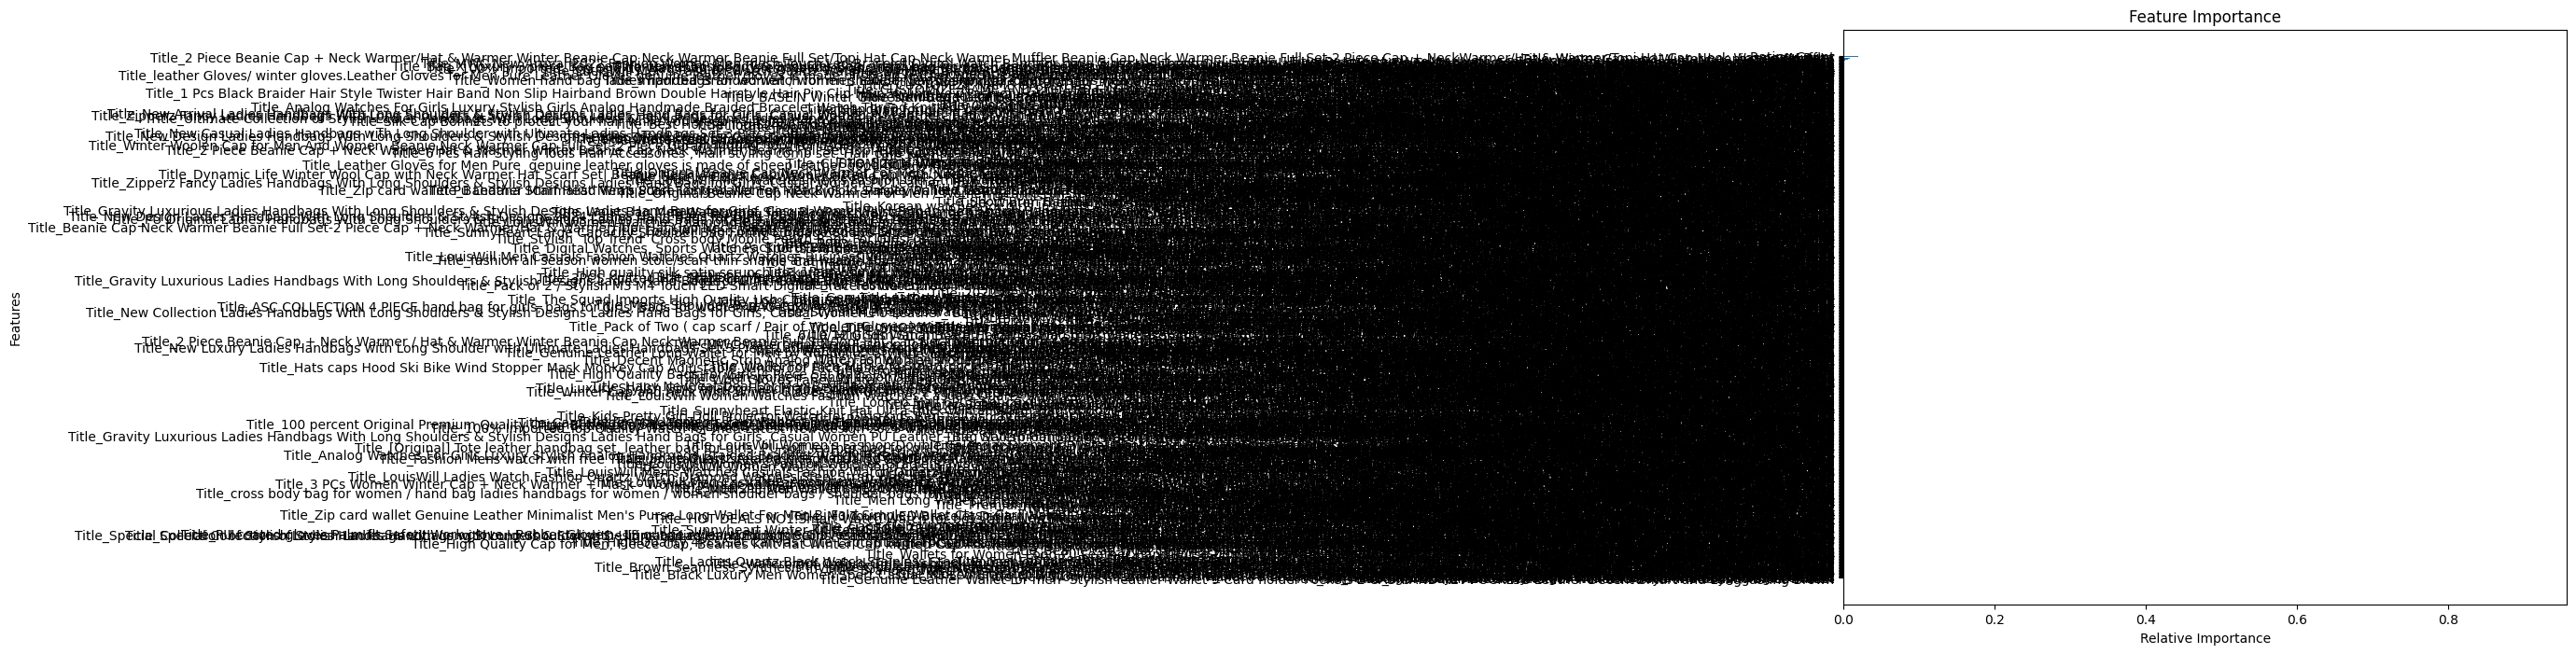

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importance from the Random Forest model
feature_importances = rf.feature_importances_

# Get the names of the features
features = X.columns

# Sort feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 8))
plt.title("Feature Importance")
plt.barh(range(len(indices)), feature_importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.gca().invert_yaxis()  # To display the highest importance feature at the top
plt.show()


In [ ]:
df_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1043 entries, 1 to 1077
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Title                1043 non-null   object 
 1   Rating in Stars      1043 non-null   float64
 2   Rating Count         1043 non-null   int64  
 3   Sold Count           1043 non-null   object 
 4   Delivery             1043 non-null   int64  
 5   Current Price        1043 non-null   int64  
 6   Original Price       1043 non-null   int64  
 7   Category             1043 non-null   int64  
 8   Date                 1043 non-null   int64  
 9   Discount             1043 non-null   int64  
 10  Discount Percentage  1043 non-null   float64
dtypes: float64(2), int64(7), object(2)
memory usage: 97.8+ KB


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Sample dataset load (assumed df_cleaned is already defined)
# Assuming df_cleaned has been preprocessed and cleaned up

# Step 1: Text Preprocessing and Feature Extraction using TF-IDF
tfidf = TfidfVectorizer(stop_words='english')  # Exclude common English stop words

# Prepare features and target
X_text = df_cleaned['Title']
X_numeric = df_cleaned.drop(columns=['Sold Count', 'Title'])  # Drop the target and Title
y = df_cleaned['Sold Count']

# Ensure 'Sold Count' is numeric
y = pd.to_numeric(y, errors='coerce')  # Convert to numeric, invalid values become NaN
df_cleaned['Sold Count'] = y  # Update df_cleaned with numeric 'Sold Count'


# Step 2: Combine text features with numeric features
# You can use a ColumnTransformer to combine the features

# Define the numeric features for scaling
numeric_features = X_numeric.select_dtypes(include=['number']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('text', tfidf, 'Title'),  # Apply TF-IDF to the Title column
        ('num', StandardScaler(), numeric_features)  # Scale numeric features
    ],
    remainder='passthrough'  # Passthrough any other columns not specified
)

# Create the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('knn', KNeighborsRegressor(n_neighbors=5))  # KNN model
])

# Define the numeric features for scaling
numeric_features = X_numeric.select_dtypes(include=['number']).columns


# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(df_cleaned, y, test_size=0.2, random_state=42)

# Step 4: Fit the model
pipeline.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = pipeline.predict(X_test)

# Step 6: Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("KNN with NLP Mean Squared Error:", mse)
print("KNN with NLP R² Score:", r2)

KNN with NLP Mean Squared Error: 1150.2727272727273
KNN with NLP R² Score: 0.9994745196532416


In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1043 entries, 1 to 1077
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Title                1043 non-null   object 
 1   Rating in Stars      1043 non-null   float64
 2   Rating Count         1043 non-null   int64  
 3   Sold Count           1043 non-null   int64  
 4   Delivery             1043 non-null   int64  
 5   Current Price        1043 non-null   int64  
 6   Original Price       1043 non-null   int64  
 7   Category             1043 non-null   int64  
 8   Date                 1043 non-null   int64  
 9   Discount             1043 non-null   int64  
 10  Discount Percentage  1043 non-null   float64
dtypes: float64(2), int64(8), object(1)
memory usage: 97.8+ KB


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Drop unnecessary columns
X = df_cleaned.drop(columns=['Sold Count', 'Title'])  # Drop 'Title' here

# Encode categorical variables (one-hot encoding)
#X = pd.get_dummies(X, columns=['Voucher', 'Delivery', 'Currency', 'Category'], drop_first=True)

# Split target and features
y = df_cleaned['Sold Count']

# Split data into training and testing sets
# IMPORTANT: Use X (without 'Title') for scaling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 1: Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Now X_train only contains numerical features
X_test_scaled = scaler.transform(X_test)

# Step 2: Initialize the KNN Regressor
knn = KNeighborsRegressor(n_neighbors=5)  # Start with 5 neighbors

# Step 3: Train the model
knn.fit(X_train_scaled, y_train)

# Step 4: Predict on the test set
y_pred_knn = knn.predict(X_test_scaled)

# Step 5: Evaluate the model
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print("KNN Mean Squared Error:", mse_knn)
print("KNN R² Score:", r2_knn)

KNN Mean Squared Error: 336749.3270813397
KNN R² Score: 0.8461624369858016


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder  # Import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Assuming 'df' is your preprocessed DataFrame and 'Sold Count' is your target variable
# Replace 'Sold Count' with the actual column name you are predicting
X = df_cleaned.drop(['Sold Count'], axis=1)  # Features
y = df_cleaned['Sold Count']  # Target variable

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Changes start here ---
# Identify categorical and numerical features
categorical_features = ['Title','Category'] # Assuming these are your categorical columns
numerical_features = X.select_dtypes(include=['number']).columns.tolist()

# Create a ColumnTransformer to handle categorical and numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),  # Passthrough numerical features
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_features)  # One-hot encode categorical features
    ])

# Apply the preprocessing to the training and test data
X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)
# --- Changes end here ---


# Initialize the models
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
knn_model = KNeighborsRegressor(n_neighbors=5)

# Train the Random Forest model
rf_model.fit(X_train_encoded, y_train) # Use encoded data

# Train the KNN model
knn_model.fit(X_train_encoded, y_train)  # Use encoded data

# Make predictions
rf_predictions = rf_model.predict(X_test_encoded) # Use encoded data
knn_predictions = knn_model.predict(X_test_encoded)  # Use encoded data

# ... (Rest of the code remains the same)

# Evaluate performance
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, r2

rf_metrics = evaluate_model(y_test, rf_predictions)
knn_metrics = evaluate_model(y_test, knn_predictions)

# Print the results
print("Random Forest Performance:")
print(f"Mean Absolute Error: {rf_metrics[0]:.2f}")
print(f"Mean Squared Error: {rf_metrics[1]:.2f}")
print(f"R-squared: {rf_metrics[2]:.2f}")

print("\nKNN Performance:")
print(f"Mean Absolute Error: {knn_metrics[0]:.2f}")
print(f"Mean Squared Error: {knn_metrics[1]:.2f}")
print(f"R-squared: {knn_metrics[2]:.2f}")


Random Forest Performance:
Mean Absolute Error: 137.92
Mean Squared Error: 90988.02
R-squared: 0.96

KNN Performance:
Mean Absolute Error: 985.56
Mean Squared Error: 2774243.59
R-squared: -0.27


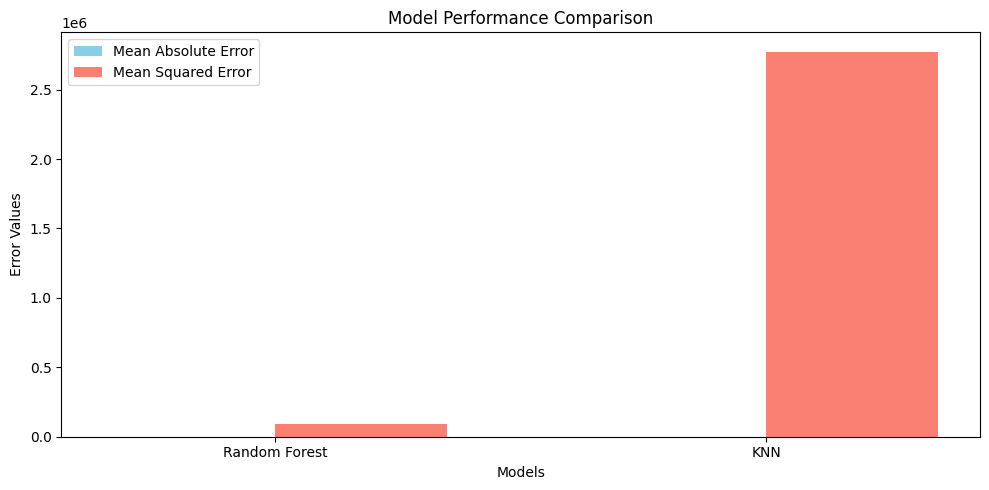

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Performance metrics
models = ['Random Forest', 'KNN']
mae_values = [137.92, 985.56]
mse_values = [90988.02, 2774243.59]

# Set up the bar chart
bar_width = 0.35
index = np.arange(len(models))

# Create the bar plots
fig, ax = plt.subplots(figsize=(10, 5))

# Bar for MAE
bar1 = ax.bar(index, mae_values, bar_width, label='Mean Absolute Error', color='skyblue')

# Bar for MSE
bar2 = ax.bar(index + bar_width, mse_values, bar_width, label='Mean Squared Error', color='salmon')

# Adding labels and title
ax.set_xlabel('Models')
ax.set_ylabel('Error Values')
ax.set_title('Model Performance Comparison')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(models)
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


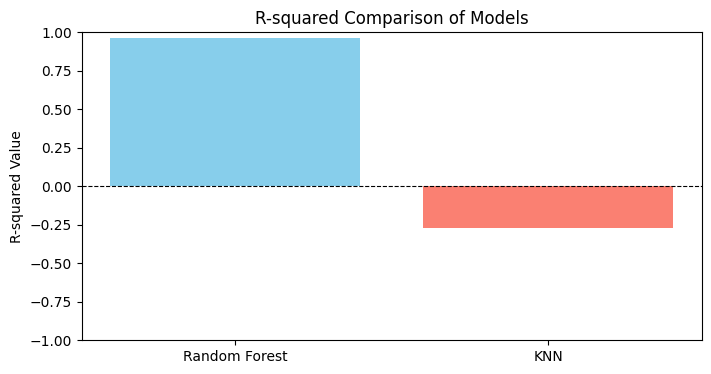

In [ ]:
# R-squared values
r2_values = [0.96, -0.27]

# Set up the bar chart for R-squared
plt.figure(figsize=(8, 4))
plt.bar(models, r2_values, color=['skyblue', 'salmon'])
plt.ylim(-1, 1)  # Set limits for R-squared values
plt.title('R-squared Comparison of Models')
plt.ylabel('R-squared Value')
plt.axhline(0, color='black', lw=0.8, linestyle='--')  # Add a line at y=0 for reference
plt.show()


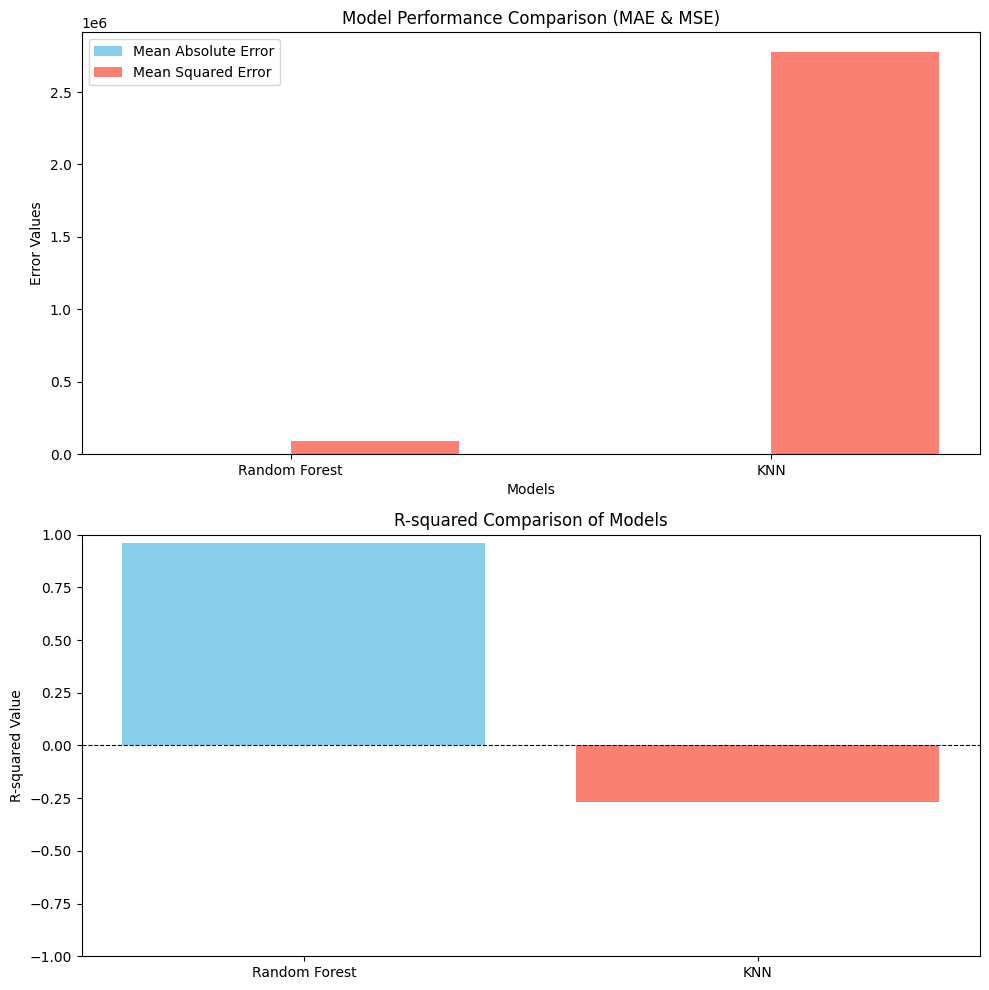

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

# Bar for MAE and MSE
bar1 = ax1.bar(index, mae_values, bar_width, label='Mean Absolute Error', color='skyblue')
bar2 = ax1.bar(index + bar_width, mse_values, bar_width, label='Mean Squared Error', color='salmon')
ax1.set_xlabel('Models')
ax1.set_ylabel('Error Values')
ax1.set_title('Model Performance Comparison (MAE & MSE)')
ax1.set_xticks(index + bar_width / 2)
ax1.set_xticklabels(models)
ax1.legend()

# R-squared values
ax2.bar(models, r2_values, color=['skyblue', 'salmon'])
ax2.set_ylim(-1, 1)
ax2.set_title('R-squared Comparison of Models')
ax2.set_ylabel('R-squared Value')
ax2.axhline(0, color='black', lw=0.8, linestyle='--')

# Show the combined plot
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder  # Import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Assuming 'df' is your preprocessed DataFrame and 'Sold Count' is your target variable
# Replace 'Sold Count' with the actual column name you are predicting
X = df_cleaned.drop(['Sold Count'], axis=1)  # Features
y = df_cleaned['Sold Count']  # Target variable

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Encoding categorical features ---
# Identify categorical and numerical features
categorical_features = ['Title', 'Category']  # Assuming these are your categorical columns
numerical_features = X.select_dtypes(include=['number']).columns.tolist()

# Create a ColumnTransformer to handle categorical and numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),  # Passthrough numerical features
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_features)  # One-hot encode categorical features
    ])

# Apply the preprocessing to the training and test data
X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)
# --- Encoding ends here ---

# Initialize the Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the Gradient Boosting model using the encoded data
gb_model.fit(X_train_encoded, y_train)  # Use X_train_encoded instead of X_train

# Make predictions using the encoded data
gb_predictions = gb_model.predict(X_test_encoded)  # Use X_test_encoded instead of X_test

# ... (Rest of the code for evaluation remains the same)

# Evaluate performance
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, r2

gb_metrics = evaluate_model(y_test, gb_predictions)

# Print the results
print("Gradient Boosting Performance:")
print(f"Mean Absolute Error: {gb_metrics[0]:.2f}")
print(f"Mean Squared Error: {gb_metrics[1]:.2f}")
print(f"R-squared: {gb_metrics[2]:.2f}")


Gradient Boosting Performance:
Mean Absolute Error: 144.64
Mean Squared Error: 92208.04
R-squared: 0.96


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Assuming 'df_cleaned' is your preprocessed DataFrame and 'Sold Count' is your target variable
# Replace 'Sold Count' with the actual column name you are predicting
X = df_cleaned.drop(['Sold Count'], axis=1)  # Features
y = df_cleaned['Sold Count']  # Target variable

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Changes start here ---
# Identify categorical and numerical features
categorical_features = ['Title', 'Category']  # Assuming these are your categorical columns
numerical_features = X.select_dtypes(include=['number']).columns.tolist()

# Create a ColumnTransformer to handle categorical and numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),  # Passthrough numerical features
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_features)  # One-hot encode categorical features
    ])

# Apply the preprocessing to the training and test data
X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)
# --- Changes end here ---

# Initialize the models
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
knn_model = KNeighborsRegressor(n_neighbors=5)
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the Random Forest model
rf_model.fit(X_train_encoded, y_train)  # Use encoded data

# Train the KNN model
knn_model.fit(X_train_encoded, y_train)  # Use encoded data

# Train the Gradient Boosting model
gb_model.fit(X_train_encoded, y_train)  # Use encoded data

# Make predictions
rf_predictions = rf_model.predict(X_test_encoded)  # Use encoded data
knn_predictions = knn_model.predict(X_test_encoded)  # Use encoded data
gb_predictions = gb_model.predict(X_test_encoded)  # Use encoded data

# Evaluate performance
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, r2

rf_metrics = evaluate_model(y_test, rf_predictions)
knn_metrics = evaluate_model(y_test, knn_predictions)
gb_metrics = evaluate_model(y_test, gb_predictions)

# Print the results
print("Random Forest Performance:")
print(f"Mean Absolute Error: {rf_metrics[0]:.2f}")
print(f"Mean Squared Error: {rf_metrics[1]:.2f}")
print(f"R-squared: {rf_metrics[2]:.2f}")

print("\nKNN Performance:")
print(f"Mean Absolute Error: {knn_metrics[0]:.2f}")
print(f"Mean Squared Error: {knn_metrics[1]:.2f}")
print(f"R-squared: {knn_metrics[2]:.2f}")

print("\nGradient Boosting Performance:")
print(f"Mean Absolute Error: {gb_metrics[0]:.2f}")
print(f"Mean Squared Error: {gb_metrics[1]:.2f}")
print(f"R-squared: {gb_metrics[2]:.2f}")


Random Forest Performance:
Mean Absolute Error: 137.92
Mean Squared Error: 90988.02
R-squared: 0.96

KNN Performance:
Mean Absolute Error: 985.56
Mean Squared Error: 2774243.59
R-squared: -0.27

Gradient Boosting Performance:
Mean Absolute Error: 144.64
Mean Squared Error: 92208.04
R-squared: 0.96


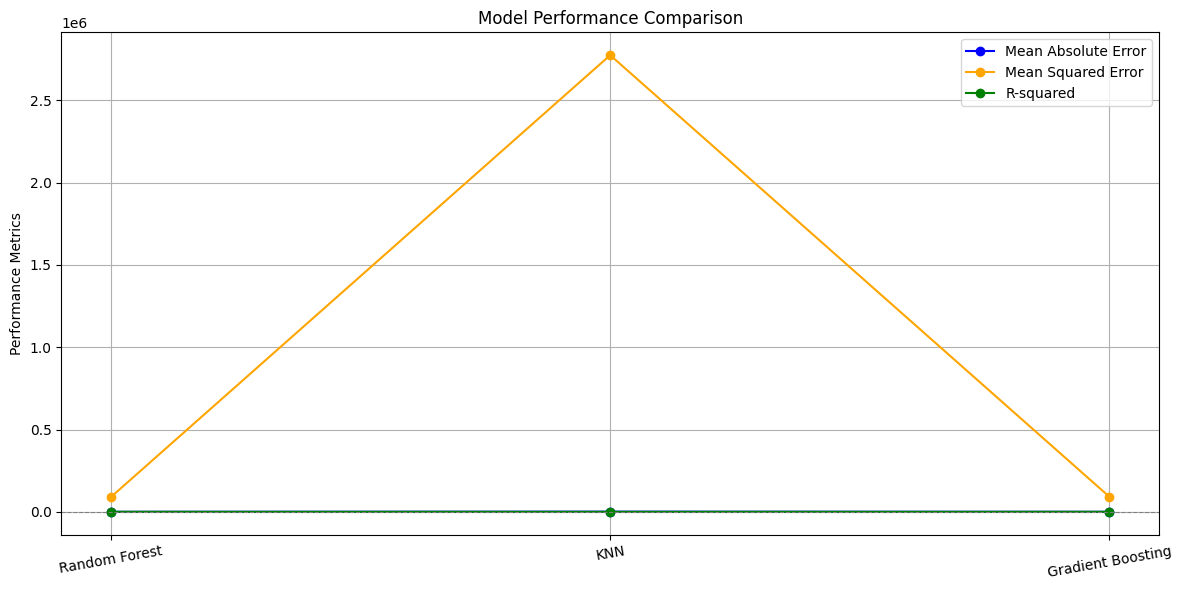

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ['Random Forest', 'KNN', 'Gradient Boosting']

# Performance metrics
mae_values = [137.92, 985.56, 144.64]
mse_values = [90988.02, 2774243.59, 92208.04]
r2_values = [0.96, -0.27, 0.96]

# Set up the line plot
plt.figure(figsize=(12, 6))

# Line plots for MAE, MSE, and R-squared
plt.plot(models, mae_values, marker='o', label='Mean Absolute Error', color='blue')
plt.plot(models, mse_values, marker='o', label='Mean Squared Error', color='orange')
plt.plot(models, r2_values, marker='o', label='R-squared', color='green')

# Adding labels and title
plt.title('Model Performance Comparison')
plt.ylabel('Performance Metrics')
plt.xticks(rotation=10)
plt.axhline(0, color='gray', lw=0.8, linestyle='--')  # Add a horizontal line at y=0 for reference
plt.legend()
plt.grid()
plt.tight_layout()

# Show the plot
plt.show()


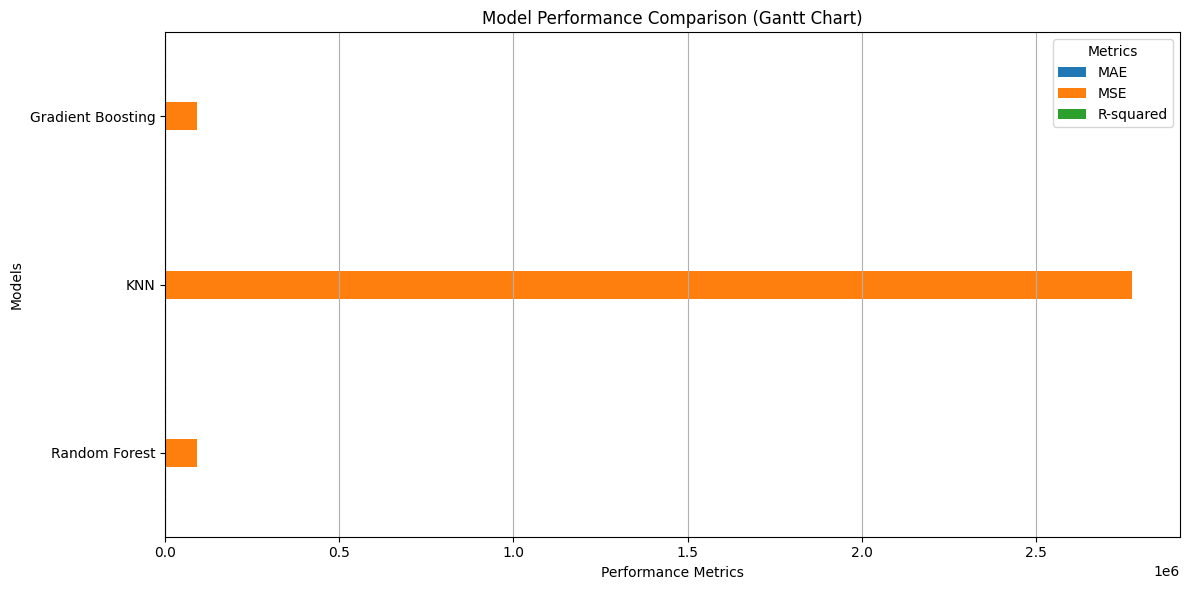

In [ ]:
import pandas as pd

# Create a DataFrame for the Gantt chart
data = {
    'Model': ['Random Forest', 'KNN', 'Gradient Boosting'],
    'MAE': [137.92, 985.56, 144.64],
    'MSE': [90988.02, 2774243.59, 92208.04],
    'R-squared': [0.96, -0.27, 0.96],
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Set the model names as the index for better plotting
df.set_index('Model', inplace=True)

# Create a horizontal bar chart (similar to a Gantt chart)
fig, ax = plt.subplots(figsize=(12, 6))

# Bar chart for each metric
df.plot(kind='barh', ax=ax)

# Adding labels and title
ax.set_title('Model Performance Comparison (Gantt Chart)')
ax.set_xlabel('Performance Metrics')
ax.set_ylabel('Models')
ax.axvline(0, color='gray', lw=0.8, linestyle='--')  # Add a vertical line at x=0 for reference
plt.legend(title='Metrics')
plt.grid(axis='x')
plt.tight_layout()

# Show the plot
plt.show()


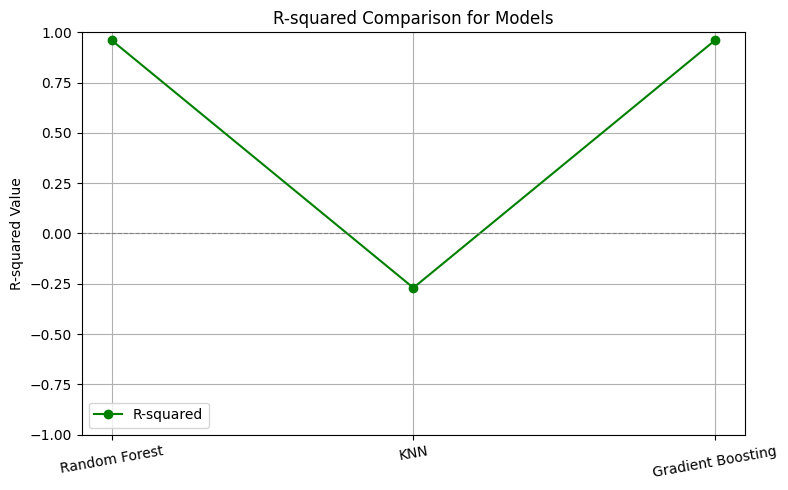

In [ ]:
import matplotlib.pyplot as plt

# Model names
models = ['Random Forest', 'KNN', 'Gradient Boosting']

# R-squared values for each model
r2_values = [0.96, -0.27, 0.96]

# Set up the line plot for R-squared values
plt.figure(figsize=(8, 5))
plt.plot(models, r2_values, marker='o', color='green', label='R-squared')

# Adding labels and title
plt.title('R-squared Comparison for Models')
plt.ylabel('R-squared Value')
plt.xticks(rotation=10)
plt.axhline(0, color='gray', lw=0.8, linestyle='--')  # Add a horizontal line at y=0 for reference
plt.ylim(-1, 1)  # Set y-limits for better visibility
plt.grid()
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


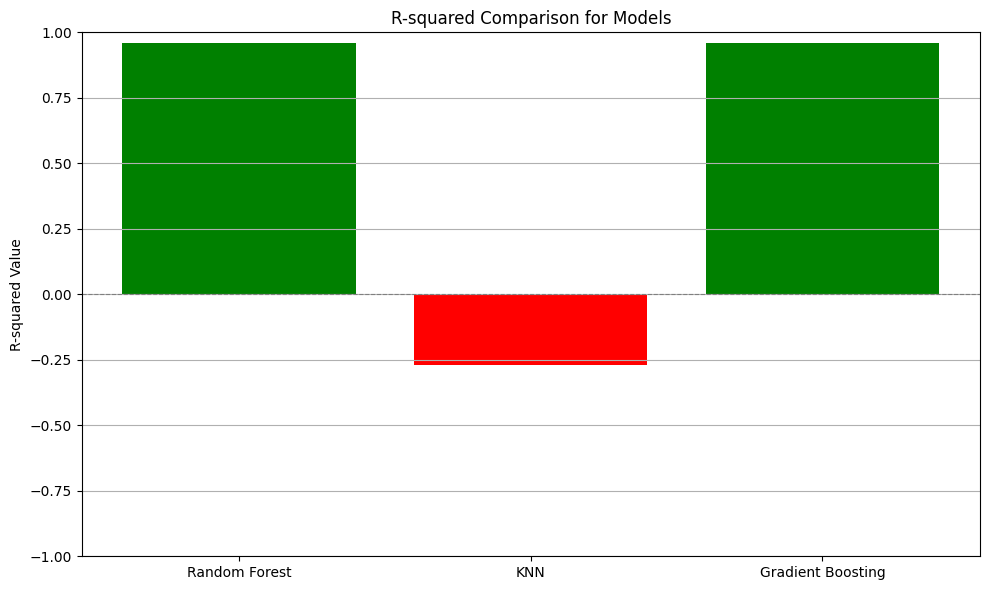

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a DataFrame for the R-squared values
data = {
    'Model': ['Random Forest', 'KNN', 'Gradient Boosting'],
    'R-squared': [0.96, -0.27, 0.96],
}

# Convert to DataFrame
df_r2 = pd.DataFrame(data)

# Create a bar chart for R-squared values
plt.figure(figsize=(10, 6))
plt.bar(df_r2['Model'], df_r2['R-squared'], color=['green', 'red', 'green'])

# Adding labels and title
plt.title('R-squared Comparison for Models')
plt.ylabel('R-squared Value')
plt.axhline(0, color='gray', lw=0.8, linestyle='--')  # Add a horizontal line at y=0 for reference
plt.ylim(-1, 1)  # Set y-limits for better visibility
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Assuming X_train is a pandas DataFrame
# 1. Identify categorical features (columns with string values)
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()

# 2. Create transformers for numerical and categorical features
numerical_features = X_train.select_dtypes(exclude=['object']).columns.tolist()

# Use OneHotEncoder for categorical features
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))  # handle_unknown='ignore' for unseen categories in test data
])

# Create ColumnTransformer to apply transformers to respective columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])


# 3. Create a pipeline that includes preprocessing and the model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor())
])

# 4. Define the hyperparameter distribution (now including preprocessor steps if needed)
param_dist = {
    'regressor__n_estimators': randint(50, 300),
    'regressor__max_depth': [None, 10, 20, 30],
    'regressor__min_samples_split': randint(2, 20),
    'regressor__min_samples_leaf': randint(1, 10)
}

# 5. Initialize RandomizedSearchCV with the pipeline
random_search = RandomizedSearchCV(estimator=pipeline, param_distributions=param_dist,
                                   n_iter=100, scoring='neg_mean_squared_error',
                                   cv=5, n_jobs=-1, verbose=2, random_state=42)

# 6. Fit the pipeline to the training data
random_search.fit(X_train, y_train)

# Get the best hyperparameters and the best score
best_params_random = random_search.best_params_
best_score_random = random_search.best_score_

print(f'Best Hyperparameters (Random Search): {best_params_random}')
print(f'Best Cross-Validated Score (Random Search): {best_score_random}')


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Hyperparameters (Random Search): {'regressor__max_depth': 20, 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 6, 'regressor__n_estimators': 267}
Best Cross-Validated Score (Random Search): -984880.4724682684


In [ ]:
import numpy as np
import pandas as pd

# Get feature importances
importances = rf_model.feature_importances_

# Get the feature names from the fitted pipeline's preprocessor
# Assuming 'preprocessor' is the name of the preprocessor step in your pipeline
# Adjusted to align with random_search and rf_model
feature_names = random_search.best_estimator_.named_steps['preprocessor'].get_feature_names_out()

# Check the lengths of feature_names and importances
print(f"Length of feature_names: {len(feature_names)}")
print(f"Length of importances: {len(importances)}")

# Ensure both arrays have the same length before creating DataFrame
# If lengths are different, investigate the cause and adjust accordingly
if len(feature_names) != len(importances):
    # In case they are different, truncate the longer array to match the shorter one
    min_len = min(len(feature_names), len(importances))
    feature_names = feature_names[:min_len]
    importances = importances[:min_len]
    print(f"Truncated arrays to length: {min_len}")

# Create a DataFrame to hold feature names and their importance
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,  # Use feature_names instead of X.columns
    'Importance': importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)


Length of feature_names: 772
Length of importances: 779
Truncated arrays to length: 772
                                               Feature    Importance
1                                    num__Rating Count  9.050319e-01
6                                            num__Date  1.775483e-02
47   cat__Title_2 Piece Beanie Cap + Neck Warmer/Ha...  1.335061e-02
691  cat__Title_Winter Cap and Winter beanie cap fo...  1.295804e-02
5                                        num__Category  9.275304e-03
3                                   num__Current Price  7.850915e-03
8                             num__Discount Percentage  7.019287e-03
0                                 num__Rating in Stars  4.748739e-03
4                                  num__Original Price  4.195437e-03
7                                        num__Discount  1.619728e-03
2                                        num__Delivery  1.447794e-03
581  cat__Title_Slim and light weight Long Wallet F...  1.311163e-03
287  cat__Title

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65289 (\N{FULLWIDTH RIGHT PARENTHESIS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


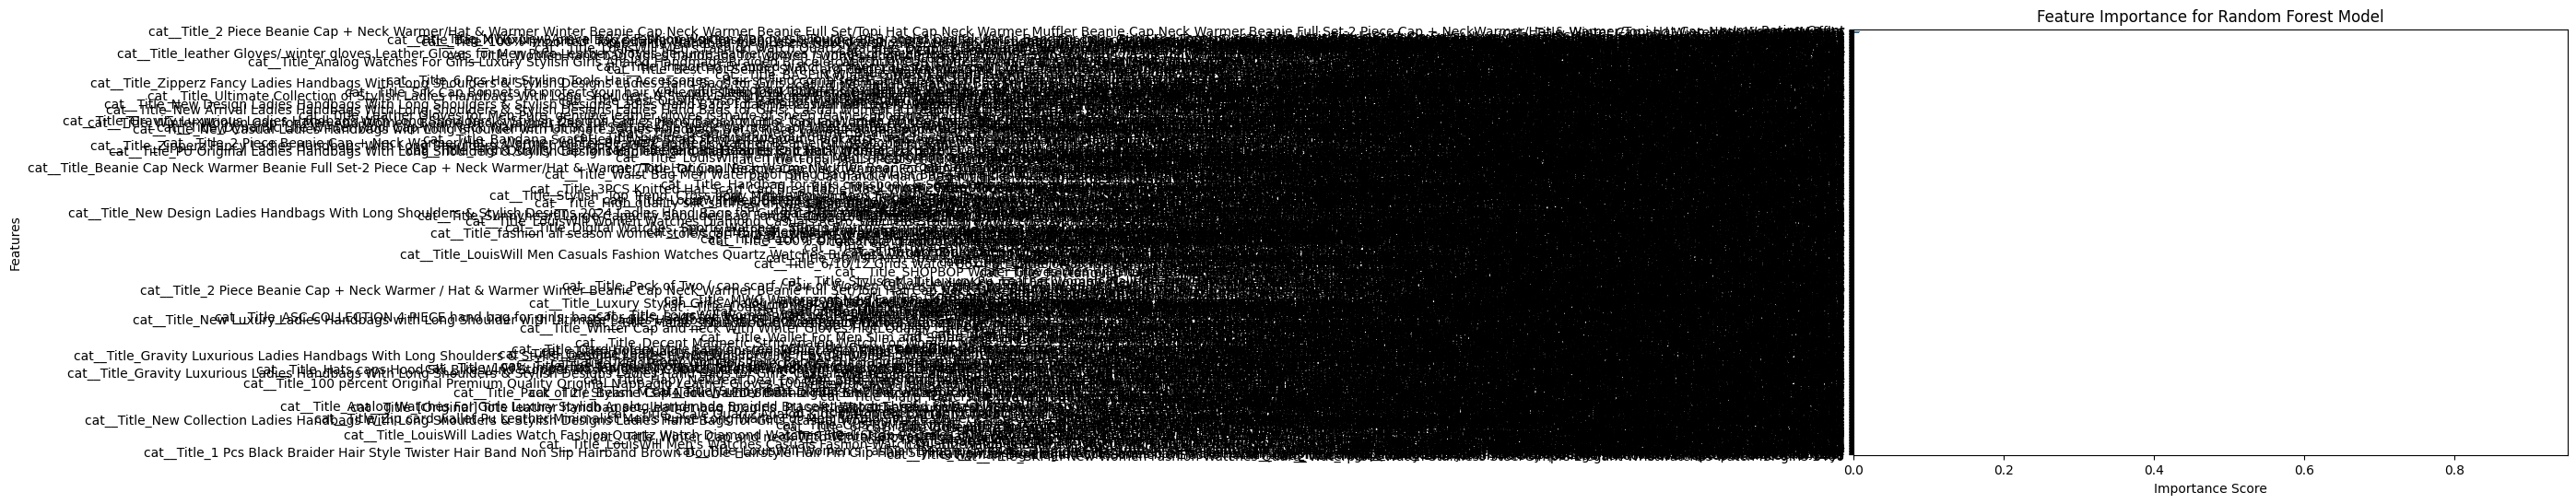

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the size of the plot
plt.figure(figsize=(10, 6))

# Create a bar plot of feature importance
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)

# Set the title and labels
plt.title('Feature Importance for Random Forest Model')
plt.xlabel('Importance Score')
plt.ylabel('Features')

# Show the plot
plt.show()


<ipython-input-117-966860c20dc2>:26: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from current font.
  plt.tight_layout()
<ipython-input-117-966860c20dc2>:26: UserWarning: Glyph 65289 (\N{FULLWIDTH RIGHT PARENTHESIS}) missing from current font.
  plt.tight_layout()
<ipython-input-117-966860c20dc2>:26: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


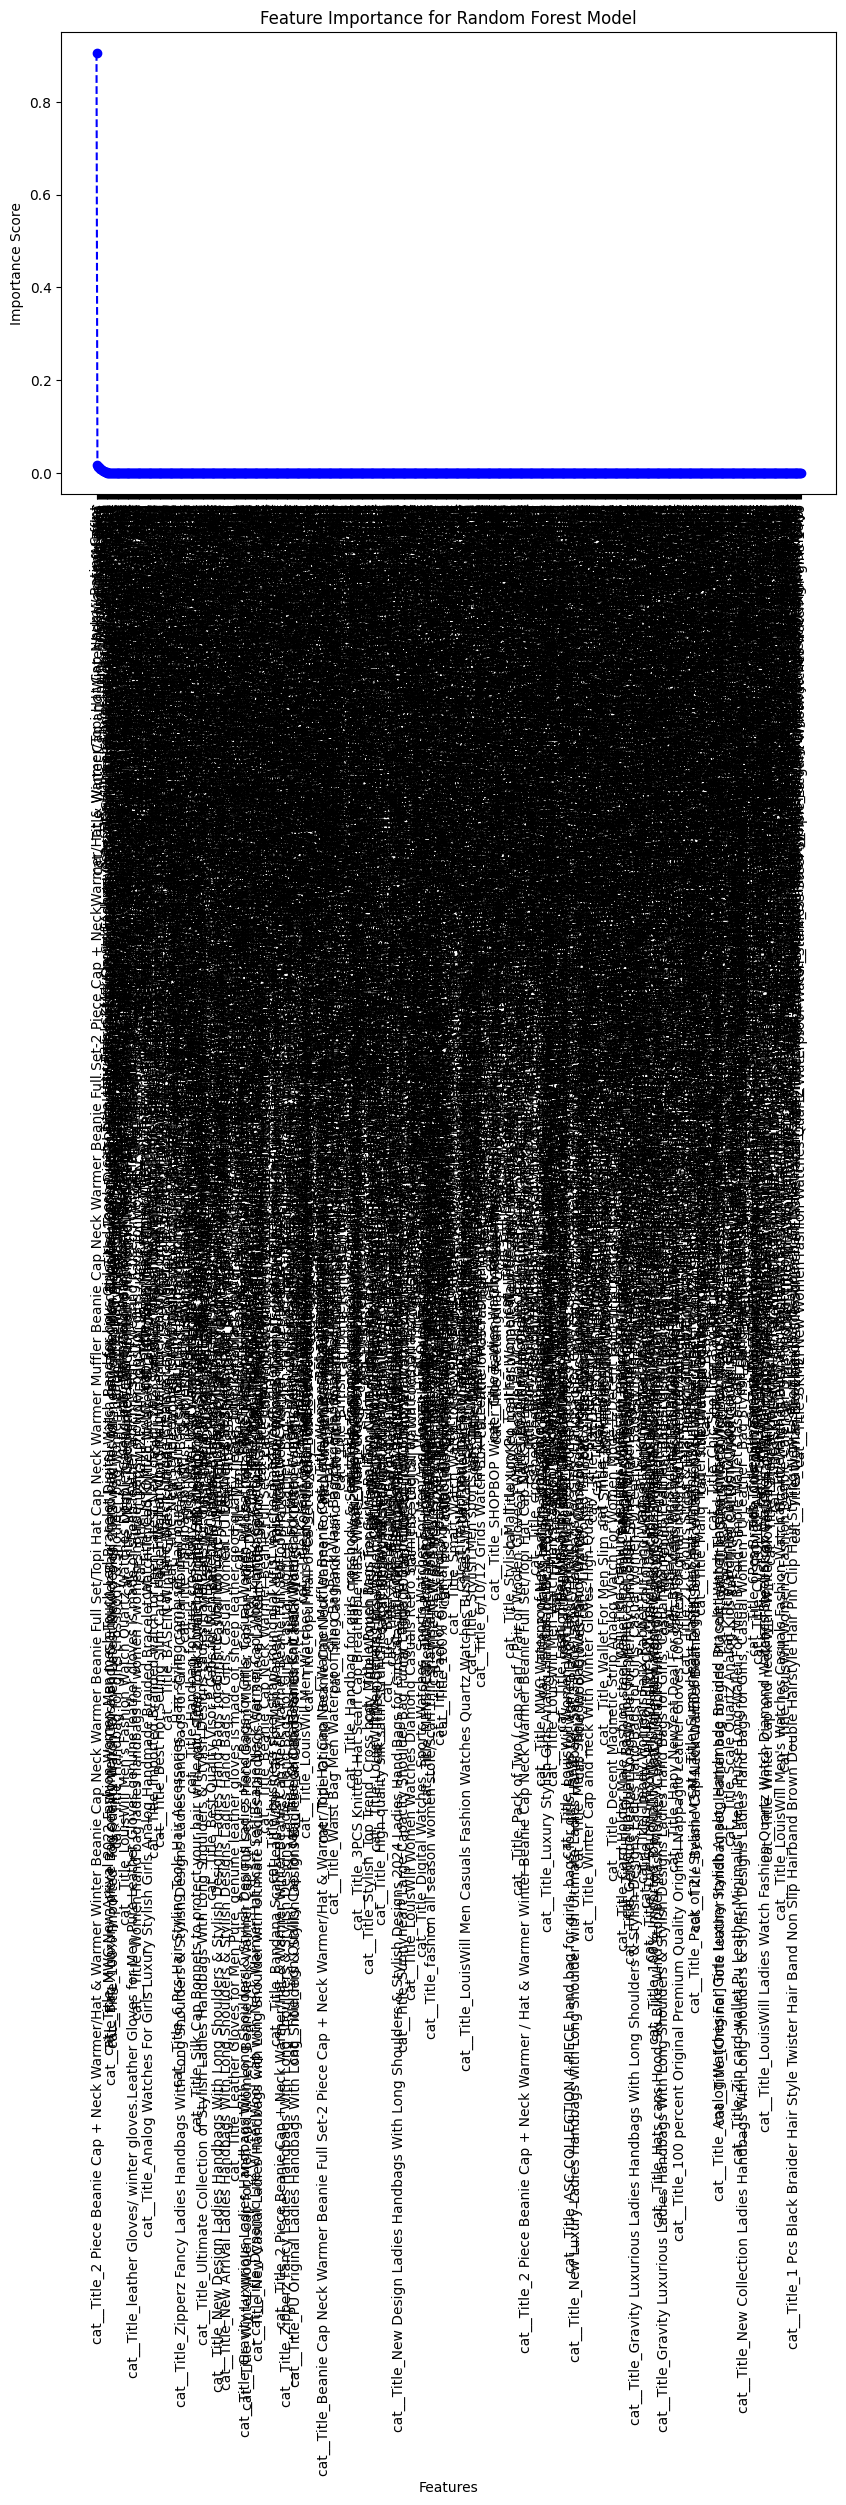

In [ ]:
import matplotlib.pyplot as plt

# Sort the feature importance data by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance as a line chart
plt.figure(figsize=(10, 6))

# Plot line connecting feature importance scores
plt.plot(feature_importance_df['Feature'], feature_importance_df['Importance'], marker='o', linestyle='--', color='blue')

# Add labels and title
plt.title('Feature Importance for Random Forest Model')
plt.xlabel('Features')
plt.ylabel('Importance Score')

# Add title and labels
plt.title('Feature Importance for Random Forest Model')
plt.xlabel('Features')
plt.ylabel('Importance Score')

# Rotate feature names on the x-axis for better readability
plt.xticks(rotation=90)

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
pip install ipywidgets scikit-learn pandas


  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Access 'Title' from the DataFrame X
title_data = X['Title']

# Convert the Title feature into a vector
vectorizer = CountVectorizer()
title_vectors = vectorizer.fit_transform(title_data).toarray()

# Combine the title vectors with the rest of the dataset
# Assuming you want to combine with the numerical features in 'X'
X = pd.concat([pd.DataFrame(title_vectors), X.drop(['Title'], axis=1)], axis=1)


In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1043 entries, 1 to 1077
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Title                1043 non-null   object 
 1   Rating in Stars      1043 non-null   float64
 2   Rating Count         1043 non-null   int64  
 3   Sold Count           1043 non-null   int64  
 4   Delivery             1043 non-null   int64  
 5   Current Price        1043 non-null   int64  
 6   Original Price       1043 non-null   int64  
 7   Category             1043 non-null   int64  
 8   Date                 1043 non-null   int64  
 9   Discount             1043 non-null   int64  
 10  Discount Percentage  1043 non-null   float64
dtypes: float64(2), int64(8), object(1)
memory usage: 97.8+ KB


In [ ]:
df_cleaned.to_csv('Watches Bags Accessories New.csv', index=False)

In [ ]:
df = pd.read_csv('Watches Bags Accessories New.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1043 entries, 0 to 1042
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Title                1043 non-null   object 
 1   Rating in Stars      1043 non-null   float64
 2   Rating Count         1043 non-null   int64  
 3   Sold Count           1043 non-null   int64  
 4   Delivery             1043 non-null   int64  
 5   Current Price        1043 non-null   int64  
 6   Original Price       1043 non-null   int64  
 7   Category             1043 non-null   int64  
 8   Date                 1043 non-null   int64  
 9   Discount             1043 non-null   int64  
 10  Discount Percentage  1043 non-null   float64
dtypes: float64(2), int64(8), object(1)
memory usage: 89.8+ KB


In [ ]:
import ipywidgets as widgets
from IPython.display import display
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pandas as pd

# Load your dataset
# Replace 'your_dataset.csv' with your actual dataset path
data = pd.read_csv('Watches Bags Accessories.csv')

# Assume the dataset has a target column 'Sold Count' and features in the other columns
X = data.drop('Sold Count', axis=1)
y = data['Sold Count']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to train the model and show performance
def train_model(n_estimators, max_depth, min_samples_split, min_samples_leaf):
    model = RandomForestRegressor(n_estimators=n_estimators,
                                  max_depth=max_depth,
                                  min_samples_split=min_samples_split,
                                  min_samples_leaf=min_samples_leaf,
                                  random_state=42)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)

    print(f"Model Performance:\nMean Absolute Error: {mae}\nRoot Mean Squared Error: {rmse}")

# Create interactive widgets
n_estimators_slider = widgets.IntSlider(value=100, min=10, max=500, step=10, description='n_estimators')
max_depth_slider = widgets.IntSlider(value=10, min=1, max=50, step=1, description='max_depth')
min_samples_split_slider = widgets.IntSlider(value=2, min=2, max=20, step=1, description='min_samples_split')
min_samples_leaf_slider = widgets.IntSlider(value=1, min=1, max=20, step=1, description='min_samples_leaf')

# Button to trigger the training process
train_button = widgets.Button(description="Train Model")

# Output area to display results
output = widgets.Output()

# Function to handle button click and trigger model training
def on_train_button_clicked(b):
    with output:
        output.clear_output()  # Clear previous outputs
        train_model(n_estimators_slider.value,
                    max_depth_slider.value,
                    min_samples_split_slider.value,
                    min_samples_leaf_slider.value)

# Connect the button click event to the function
train_button.on_click(on_train_button_clicked)

# Display the widgets and output
display(n_estimators_slider, max_depth_slider, min_samples_split_slider, min_samples_leaf_slider, train_button, output)


IntSlider(value=100, description='n_estimators', max=500, min=10, step=10)

IntSlider(value=10, description='max_depth', max=50, min=1)

IntSlider(value=2, description='min_samples_split', max=20, min=2)

IntSlider(value=1, description='min_samples_leaf', max=20, min=1)

Button(description='Train Model', style=ButtonStyle())

Output()

In [ ]:
import ipywidgets as widgets
from IPython.display import display
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.feature_extraction.text import CountVectorizer


# Load your preprocessed dataset
data = pd.read_csv('Watches Bags Accessories New.csv')

# ----> Get the original feature names used during training (from your training data)
original_feature_names = data.drop('Sold Count', axis=1).columns.tolist()  # Assuming 'Sold Count' is your target

# Preprocessing: Convert 'Title' to numerical features using CountVectorizer
title_data = data['Title']
vectorizer = CountVectorizer()
title_vectors = vectorizer.fit_transform(title_data).toarray()

# ----> Create title_df with the original feature names
title_feature_names = [f"title_{i}" for i in range(title_vectors.shape[1])]
title_df = pd.DataFrame(title_vectors, columns=title_feature_names)

# ----> Combine title_df with other features, preserving original feature names
X = pd.concat([title_df, data.drop(['Title', 'Sold Count'], axis=1)], axis=1)

y = data['Sold Count']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the initial model (you can adjust hyperparameters later)
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)



# Function to predict demand
def predict_demand(title_index, rating, discount, price):
    # Create input features for prediction
    vocabulary = vectorizer.vocabulary_
    title_features = [0] * len(vocabulary)

    try:
        index = list(vocabulary.keys()).index(title_dropdown.value)
        title_features[index] = 1
    except ValueError:
        pass

    # ----> Create a dictionary to hold all features with their names
    all_features = dict(zip(original_feature_names, [0] * len(original_feature_names)))  # Initialize all features to 0

    # ----> Update the title features and other numerical features
    for i, feature_name in enumerate(vocabulary):
        if feature_name in original_feature_names:
            all_features[feature_name] = title_features[i]  # Update title features in the dictionary

    # Update other numerical features in the dictionary
    all_features['Rating in Stars'] = rating
    all_features['Discount'] = discount
    all_features['Current Price'] = price

    # ----> Create a DataFrame with the correct number of features and names
    input_data = pd.DataFrame([all_features])

    # Make prediction using the DataFrame
    prediction = model.predict(input_data)[0]

    # Categorize demand
    if prediction > 80:
        demand = "High"
    elif prediction > 30:
        demand = "Medium"
    else:
        demand = "Low"

    return demand, prediction



# Create interactive widgets
title_dropdown = widgets.Dropdown(
    options=list(vectorizer.vocabulary_.keys()),  # Options from your 'Title' column
    description='Product Title:',
)
rating_slider = widgets.FloatSlider(
    value=3, min=0, max=5, step=0.1, description='Rating (0-5 Stars):'
)
discount_slider = widgets.FloatSlider(
    value=0, min=0, max=100, step=1, description='Discount Percentage (%):'
)
price_input = widgets.FloatText(
    value=100, description='Current Price (Rs):'
)

# Output widget to display the prediction
output = widgets.Output()

# Function to handle interactions and update output
def on_value_change(change):
    with output:
        output.clear_output()

        title_index = list(vectorizer.vocabulary_.keys()).index(title_dropdown.value)
        demand, prediction = predict_demand(title_index, rating_slider.value, discount_slider.value, price_input.value)

        print(f"Predicted Demand: {demand}")
        print(f"Predicted Sold Count: {prediction:.2f}")

# Observe widget changes and trigger the update function
title_dropdown.observe(on_value_change, names='value')
rating_slider.observe(on_value_change, names='value')
discount_slider.observe(on_value_change, names='value')
price_input.observe(on_value_change, names='value')

# Display the widgets and output
display(title_dropdown, rating_slider, discount_slider, price_input, output)

Dropdown(description='Product Title:', options=('100', 'imported', 'led', 'watch', 'for', 'men', 'boys', 'and'…

FloatSlider(value=3.0, description='Rating (0-5 Stars):', max=5.0)

FloatSlider(value=0.0, description='Discount Percentage (%):', step=1.0)

FloatText(value=100.0, description='Current Price (Rs):')

Output()